# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


In [4]:
print(cities)

['chonchi', 'manacapuru', 'lihue', 'avarua', 'iquitos', 'ust-nera', 'waitangi', 'moyynkum', 'kimbe', 'wailua homesteads', 'west island', 'badger', 'taoudenni', 'waingapu', 'san luis de la loma', 'pacific grove', 'tiruchchendur', 'sakakah', 'bilibino', 'qui nhon', 'keflavik', 'palikir - national government center', 'thompson', 'hawaiian paradise park', 'sola', 'bethel', 'grytviken', 'ribeira grande', 'albany', 'petropavlovsk-kamchatsky', 'kenora', 'adamstown', 'suva', 'port-aux-francais', 'atafu village', 'mount pearl', 'tres barras', 'kumi', 'tiksi', 'olonkinbyen', 'margaret river', 'springbok', 'blackmans bay', 'laguna', 'lubao', 'balneario camboriu', 'qaqortoq', 'mamadysh', 'iqaluit', 'balashov', 'monetnyy', 'talcahuano', 'puerto natales', 'purranque', 'nago', 'ilulissat', 'kontiolahti', 'praia', 'cartagena', 'udachny', 'timimoun', 'amahai', 'port elizabeth', 'ushuaia', 'hamilton', 'kolasib', 'nemuro', 'pirallahi', 'binkolo', 'severo-yeniseyskiy', 'taiohae', 'monroeville', 'yellowkni

In [7]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='


    
city_url = f'{url}chonchi&appid={weather_api_key}'

city_weather = requests.get(city_url).json()

pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 60},
 'cod': 200,
 'coord': {'lat': -42.6128, 'lon': -73.8092},
 'dt': 1702086397,
 'id': 3894871,
 'main': {'feels_like': 282.79,
          'grnd_level': 1013,
          'humidity': 96,
          'pressure': 1023,
          'sea_level': 1023,
          'temp': 283.22,
          'temp_max': 283.71,
          'temp_min': 283.22},
 'name': 'Chonchi',
 'sys': {'country': 'CL',
         'id': 2043794,
         'sunrise': 1702026679,
         'sunset': 1702081384,
         'type': 2},
 'timezone': -10800,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 286, 'gust': 3.05, 'speed': 1.22}}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{cities[i]}&appid={weather_api_key}'
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chonchi
Processing Record 2 of Set 1 | manacapuru
Processing Record 3 of Set 1 | lihue
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | iquitos
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | moyynkum
Processing Record 9 of Set 1 | kimbe
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | taoudenni
Processing Record 14 of Set 1 | waingapu
Processing Record 15 of Set 1 | san luis de la loma
Processing Record 16 of Set 1 | pacific grove
Processing Record 17 of Set 1 | tiruchchendur
Processing Record 18 of Set 1 | sakakah
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | qui nhon
Processing Record 21 of Set 1 | keflavik
Processing Record 22 of Set 1 | palikir - national government cen

In [21]:
print(city_data)

[{'City': 'chonchi', 'Lat': -42.6128, 'Lng': -73.8092, 'Max Temp': 282.71, 'Humidity': 96, 'Cloudiness': 60, 'Wind Speed': 1.22, 'Country': 'CL', 'Date': 1702088131}, {'City': 'manacapuru', 'Lat': -3.2997, 'Lng': -60.6206, 'Max Temp': 299.04, 'Humidity': 88, 'Cloudiness': 74, 'Wind Speed': 1.18, 'Country': 'BR', 'Date': 1702087934}, {'City': 'lihue', 'Lat': 21.9789, 'Lng': -159.3672, 'Max Temp': 299.73, 'Humidity': 78, 'Cloudiness': 100, 'Wind Speed': 2.57, 'Country': 'US', 'Date': 1702088077}, {'City': 'avarua', 'Lat': -21.2078, 'Lng': -159.775, 'Max Temp': 299.18, 'Humidity': 73, 'Cloudiness': 75, 'Wind Speed': 6.69, 'Country': 'CK', 'Date': 1702088133}, {'City': 'iquitos', 'Lat': -3.7481, 'Lng': -73.2472, 'Max Temp': 298.17, 'Humidity': 88, 'Cloudiness': 100, 'Wind Speed': 2.06, 'Country': 'PE', 'Date': 1702088134}, {'City': 'ust-nera', 'Lat': 64.5667, 'Lng': 143.2, 'Max Temp': 247.7, 'Humidity': 98, 'Cloudiness': 90, 'Wind Speed': 1.22, 'Country': 'RU', 'Date': 1702088089}, {'City'

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chonchi,-42.6128,-73.8092,282.71,96,60,1.22,CL,1702088131
1,manacapuru,-3.2997,-60.6206,299.04,88,74,1.18,BR,1702087934
2,lihue,21.9789,-159.3672,299.73,78,100,2.57,US,1702088077
3,avarua,-21.2078,-159.7750,299.18,73,75,6.69,CK,1702088133
4,iquitos,-3.7481,-73.2472,298.17,88,100,2.06,PE,1702088134


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,282.71,96,60,1.22,CL,1702088131
1,manacapuru,-3.2997,-60.6206,299.04,88,74,1.18,BR,1702087934
2,lihue,21.9789,-159.3672,299.73,78,100,2.57,US,1702088077
3,avarua,-21.2078,-159.7750,299.18,73,75,6.69,CK,1702088133
4,iquitos,-3.7481,-73.2472,298.17,88,100,2.06,PE,1702088134


In [31]:
#converting temperatures to C
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,9.56,96,60,1.22,CL,1702088131
1,manacapuru,-3.2997,-60.6206,25.89,88,74,1.18,BR,1702087934
2,lihue,21.9789,-159.3672,26.58,78,100,2.57,US,1702088077
3,avarua,-21.2078,-159.7750,26.03,73,75,6.69,CK,1702088133
4,iquitos,-3.7481,-73.2472,25.02,88,100,2.06,PE,1702088134
...,...,...,...,...,...,...,...,...,...
578,la ronge,55.1001,-105.2842,-6.88,93,40,1.54,CA,1702088411
579,stonehaven,56.9637,-2.2118,8.56,99,100,7.79,GB,1702088411
580,mpanda,-6.3655,31.0409,17.94,99,100,1.21,TZ,1702088412


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

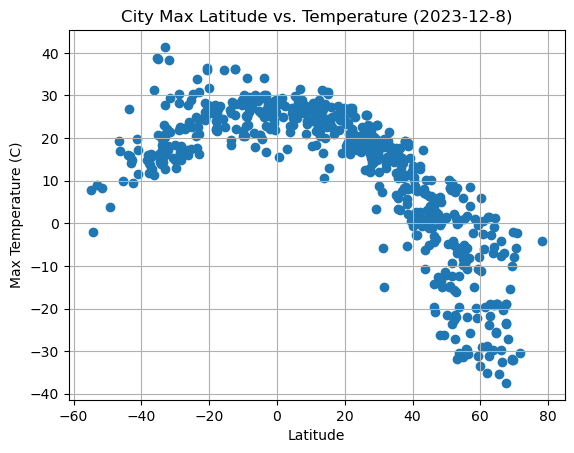

In [34]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x,y)
plt.title('City Max Latitude vs. Temperature (2023-12-8)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

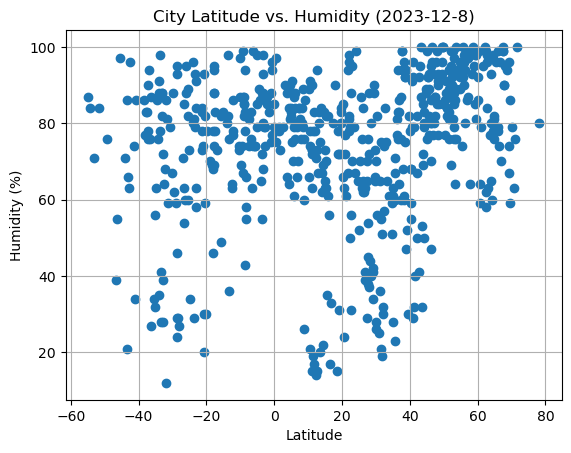

In [37]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.title('City Latitude vs. Humidity (2023-12-8)')
plt.scatter(x,y)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

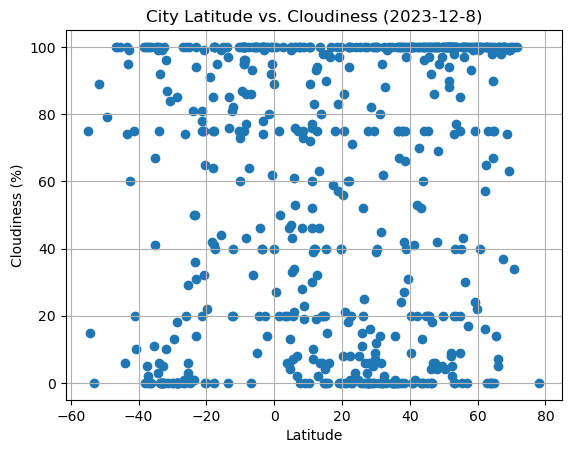

In [38]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.title('City Latitude vs. Cloudiness (2023-12-8)')
plt.scatter(x,y)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

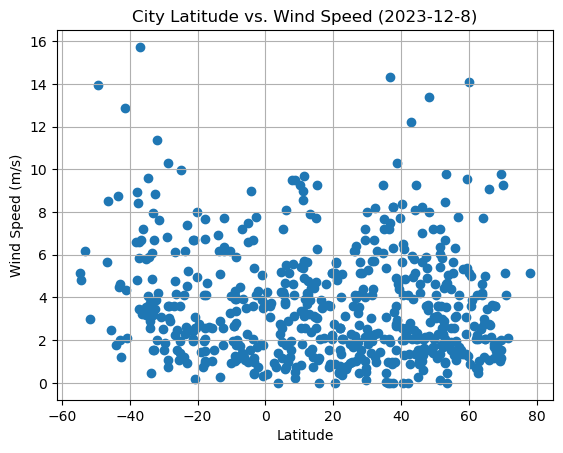

In [39]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.title('City Latitude vs. Wind Speed (2023-12-8)')
plt.scatter(x,y)



# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
slope, intercept, r, p, se = linregress(x, y)

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lihue,21.9789,-159.3672,26.58,78,100,2.57,US,1702088077
5,ust-nera,64.5667,143.2000,-25.45,98,90,1.22,RU,1702088089
7,moyynkum,44.2914,72.9469,0.36,50,100,1.35,KZ,1702088135
9,wailua homesteads,22.0669,-159.3780,26.24,81,100,2.57,US,1702088136
11,badger,64.8000,-147.5333,-18.99,82,75,2.06,US,1702088137


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chonchi,-42.6128,-73.8092,9.56,96,60,1.22,CL,1702088131
1,manacapuru,-3.2997,-60.6206,25.89,88,74,1.18,BR,1702087934
3,avarua,-21.2078,-159.7750,26.03,73,75,6.69,CK,1702088133
4,iquitos,-3.7481,-73.2472,25.02,88,100,2.06,PE,1702088134
6,waitangi,-43.9535,-176.5597,16.01,71,6,1.79,NZ,1702088135


###  Temperature vs. Latitude Linear Regression Plot

<function matplotlib.pyplot.show(close=None, block=None)>

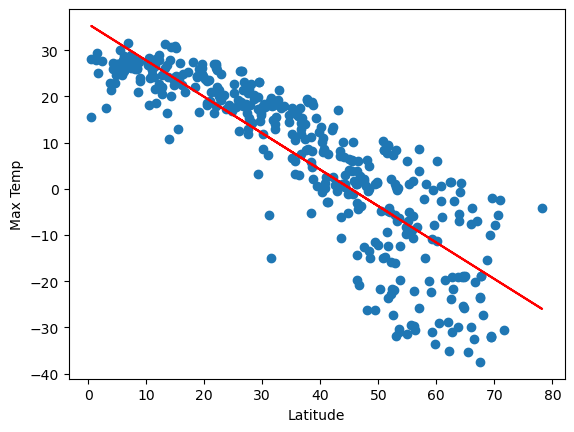

In [45]:
# Linear regression on Northern Hemisphere


x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
results = linregress(x, y)
plt.scatter(x,y)
plt.plot(x, results.intercept + results.slope*x, 'r')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

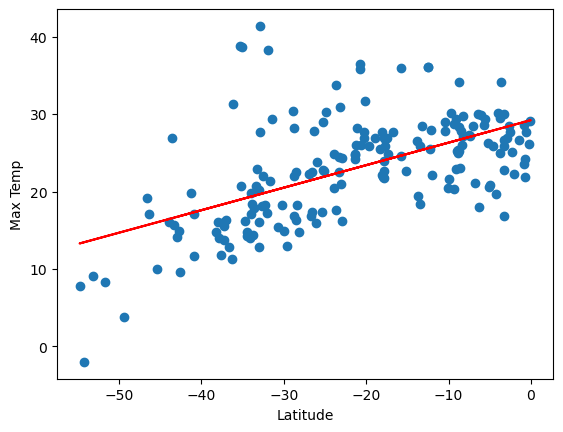

In [46]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
results = linregress(x, y)
plt.scatter(x,y)
plt.plot(x, results.intercept + results.slope*x, 'r')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show


**Discussion about the linear relationship:** 
We can see a fairly recognizable correlation for higher temperatures the closer the location in question is to 0 Latitude. This is a fairly expected out come given the equator is typically associstated with warmer tropical climates. 

One important distinction is how much more pronounced the relationship is for the cities with a positive latitude in the northern hemisphere. This could likely be related to there being a lot more landmass and there fore alot more chances for variation in climates. It's important to note that the northern hemisphere has nearly 20 more degrees of latitude which again is due to there being more landmass further away from the equator and with that a more pronounced change in temperature. 

### Humidity vs. Latitude Linear Regression Plot

<function matplotlib.pyplot.show(close=None, block=None)>

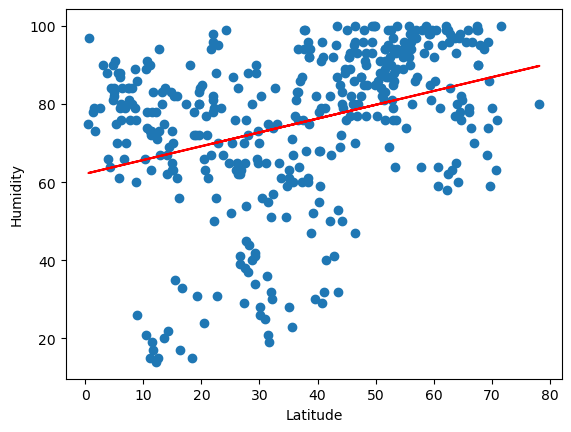

In [47]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
results = linregress(x, y)
plt.scatter(x,y)
plt.plot(x, results.intercept + results.slope*x, 'r')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

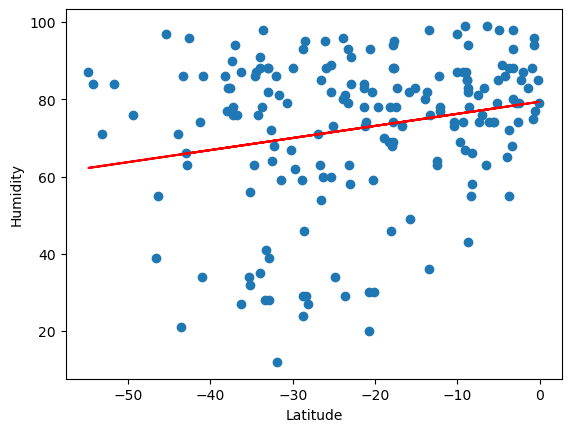

In [48]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
results = linregress(x, y)
plt.scatter(x,y)
plt.plot(x, results.intercept + results.slope*x, 'r')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show


**Discussion about the linear relationship:** 
Interestingly the difference correlation between humidity and latitude is much less distinct. There is seemingly no real correlation between the two in the southern hemispehere and a slightly positive correlation in the northern hemisphere. 

The northern hemisphere does have a fairly strong relationship the further north you go. This could be due to the large amount of forested areas in the north which require higher amounts of water therefore humidity as opposed to areas in the south. 

The lack of relationship in the Southern Hemisphere is likely due to a rather high amount of outliers which are more than likely caused by the numerous desert climates on the southern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

<function matplotlib.pyplot.show(close=None, block=None)>

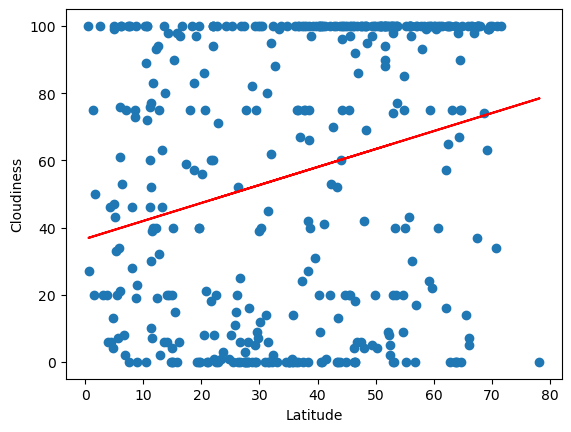

In [49]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
results = linregress(x, y)
plt.scatter(x,y)
plt.plot(x, results.intercept + results.slope*x, 'r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

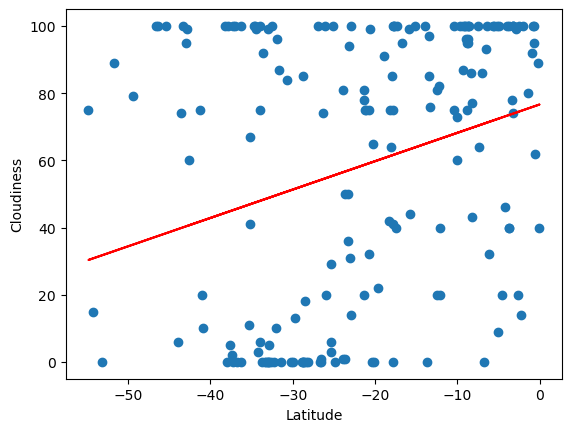

In [50]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
results = linregress(x, y)
plt.scatter(x,y)
plt.plot(x, results.intercept + results.slope*x, 'r')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show


**Discussion about the linear relationship:**

The relationship between latitudes and cloudiness is very weak at best. It may be due to rounding in data collections but we see some very pronounced lines in the data with regards to cloudiness. This is more than likely having an effect on our regression and contributing to the very weak relationship. It's unlikely that even without these rounding errors we would see any real correlation form however as we can see a huge range for cloudiness at similar latitudes in both souther and northern hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

<function matplotlib.pyplot.show(close=None, block=None)>

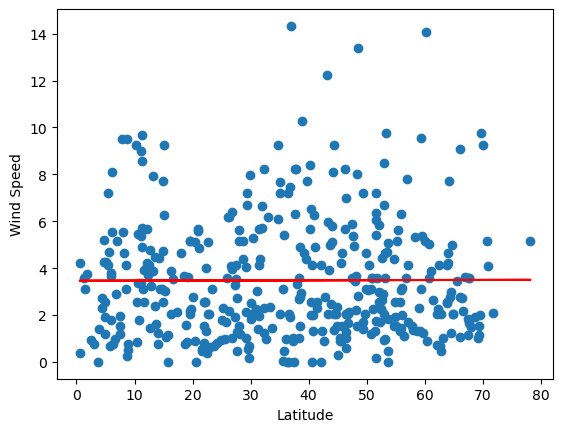

In [51]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
results = linregress(x, y)
plt.scatter(x,y)
plt.plot(x, results.intercept + results.slope*x, 'r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

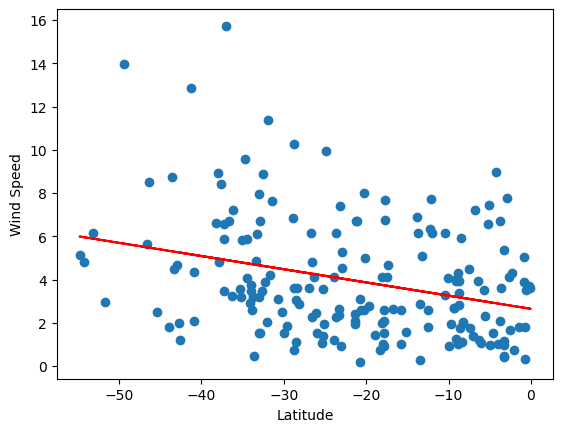

In [52]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
results = linregress(x, y)
plt.scatter(x,y)
plt.plot(x, results.intercept + results.slope*x, 'r')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show


**Discussion about the linear relationship:** 
This final calculation shows no relationship whatsoever between wind speed and location. I would even go as far as to say that the southern hemispheres negative relationship is clearly due to a lack of data for the latitudes below -40. This lack of data is creating what looks to be a posisble negative correlation and could be misleading to some. Nearly every section has wind speeds ranging from 0 to 10 on both the northern and southern hemispheres. 